# Simulated Data across Methods

In [96]:
from mvlearn.embed import KCCA, DCCA
from mvlearn.datasets import GaussianMixture
from mvlearn.plotting import crossviews_plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Raw Data

In [239]:
## Make Latents
np.random.seed(12345)
n = 200
#mu = [[0,0], [0,0]]
#sigma = [[[3,0],[0,2]], [[3,0],[0,2]]]
#pi = [0.5,0.5]
mu = [0,0]
sigma = [[4,0],[0,3]]
GM_train = GaussianMixture(mu,sigma,n)#,class_probs=pi)

## Test
GM_test = GaussianMixture(mu,sigma,200)#,class_probs=pi)

In [240]:
## Make 2 views
n_noise = 2
transforms = ['linear', 'poly', 'sin']

Xs_train = []
Xs_test = []
for transform in transforms:
    GM_train.sample_views(transform=transform, n_noise=n_noise, noise_var=0.5)
    GM_test.sample_views(transform=transform, n_noise=n_noise, noise_var=0.5)

    Xs_train.append(GM_train.get_Xy()[0])
    Xs_test.append(GM_test.get_Xy()[0])

In [134]:
## Plotting parameters
labels = GM_test.latent[:,0]
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("husl", len(labels)).as_hex())
cmap = matplotlib.colors.ListedColormap(sns.diverging_palette(240, 10, n=len(labels), center='light').as_hex())
cmap = 'coolwarm'

save_dir = '/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/figures/multiview/paper_figures/husl/'

context='poster'
show=False

scatter_kwargs = {'alpha':1.0}

In [6]:
for i,transform in enumerate(transforms):
    crossviews_plot(Xs_train[i], labels, dimensions=[0,1], ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{transform}_train.png')
        plt.close()
    crossviews_plot(Xs_test[i], labels, dimensions=[0,1], ax_ticks=False, ax_labels=False, equal_axes=True, context=context,cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{transform}_test.png')
        plt.close()

## Linear KCCA

In [103]:
ktype='linear'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## Polynomial KCCA

In [104]:
ktype='poly'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## Gaussian

In [105]:
ktype='gaussian'
kcca = KCCA(ktype=ktype, reg = 1.0, sigma=2.0, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## DCCA

In [108]:
for i,transform in enumerate(transforms):
    input_size1, input_size2 = Xs_train[i][0].shape[1], Xs_train[i][1].shape[1]
    outdim_size = min(Xs_train[i][0].shape[1], 2)
    layer_sizes1 = [256, 512, outdim_size]
    layer_sizes2 = [256, 512, outdim_size]
    dcca = DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2, epoch_num=400)
    components = dcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'dcca_{transform}-test.png')
        plt.close()

## One Figure

In [241]:
## Plotting parameters
labels = GM_test.latent[:,0]
cmap = matplotlib.colors.ListedColormap(sns.diverging_palette(240, 10, n=len(labels), center='light').as_hex())
cmap = 'coolwarm'

method_labels = ['Raw\nViews', 'Linear\nKCCA', 'Polynomial\nKCCA', 'Gaussian\nKCCA', 'Deep\nCCA']
transform_labels = ['Linear\nTransform', 'Polynomial\nTransform', 'Sinusoidal\nTransform']

input_size1, input_size2 = Xs_train[0][0].shape[1], Xs_train[0][1].shape[1]
outdim_size = min(Xs_train[0][0].shape[1], 1)
layer_sizes1 = [400,100, outdim_size]
layer_sizes2 = [400,100,outdim_size]
methods = [KCCA(ktype='linear', reg = 0.1, degree=2.0, constant=0.1, n_components = 1),
           KCCA(ktype='poly', reg = 0.1, degree=2.0, constant=0.1, n_components = 1),
           KCCA(ktype='gaussian', reg = 1.0, sigma=2.0, n_components = 1),
           DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2, epoch_num=400)
]

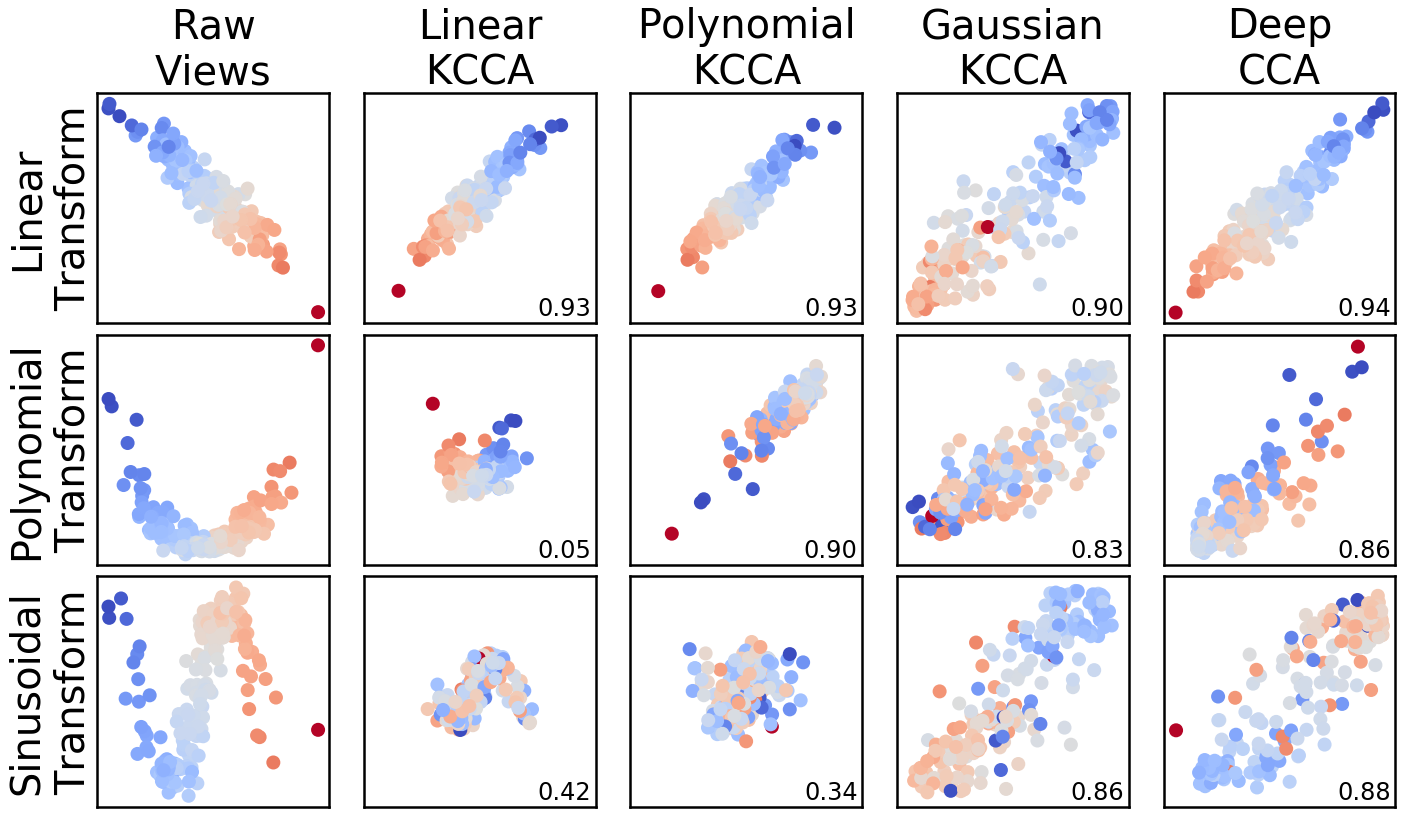

In [242]:
fig, axes = plt.subplots(3, 5, figsize=(20,12))
sns.set_context('poster')

for r,transform in enumerate(transforms):
    ax = axes[r,0]
    ax.scatter(
        Xs_test[r][0][:, 0],
        Xs_test[r][1][:, 0],
        cmap=cmap,
        c=labels,
    )
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_ylabel(transform_labels[r], {'fontsize':40})
    if r == 0:
        ax.set_title(method_labels[0], {'fontsize':40})
    for c,method in enumerate(methods):
        ax = axes[r,c+1]
        Xs = method.fit(Xs_train[r]).transform(Xs_test[r])
        ax.scatter(
            Xs[0][:,0],
            Xs[1][:,0],
            cmap=cmap,
            c=labels,
        )
        corr = np.corrcoef(Xs[0][:,0],Xs[1][:,0])[0,1]
        ax.text(0.98,0.01, f'{corr:.2f}',size=24, horizontalalignment='right', verticalalignment='bottom', transform = ax.transAxes)
        if r == 0:
            ax.set_title(method_labels[c+1], {'fontsize':40})
        ax.axis("equal")
        ax.set_xticks([], [])
        ax.set_yticks([], [])

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.05) # set the spacing between axes. 
#plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/figures/paper_figures/all_plots_v4.pdf')
plt.show()

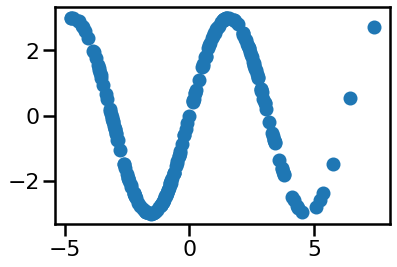

In [194]:
plt.scatter(GM_test.latent[:,0], 3*np.sin(GM_test.latent[:,0]))